<a href="https://colab.research.google.com/github/pvay1971/EXAMEN-MODULO-2/blob/main/Examen_certificacion_modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Paso 1: Carga y Combinación de Datasets
import pandas as pd
import numpy as np # Necesario para pasos posteriores

# Cargar los datasets. Usamos el separador ';' como se detectó.
try:
    df_red = pd.read_csv('winequality-red.csv', sep=';')
    df_white = pd.read_csv('winequality-white.csv', sep=';')

    # Añadir una columna para identificar el tipo de vino
    df_red['type'] = 'red'
    df_white['type'] = 'white'

    # Combinar los dos DataFrames
    df_wine = pd.concat([df_red, df_white], ignore_index=True)

    print("Primeras 5 filas del DataFrame combinado (df_wine):")
    print(df_wine.head())
    print("\nInformación general del DataFrame combinado:")
    df_wine.info()

except FileNotFoundError:
    print("Error: Asegúrate de que los archivos 'winequality-red.csv' y 'winequality-white.csv' estén cargados en tu entorno de Colab.")

Primeras 5 filas del DataFrame combinado (df_wine):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      

In [4]:
# Paso 2: Limpieza de Datos
# 1. Identificación y eliminación de valores duplicados

# Contar cuántas filas son duplicados exactos
duplicates_count = df_wine.duplicated().sum()
print(f"Número de filas duplicadas encontradas: {duplicates_count}")

# Eliminar los duplicados
df_wine_cleaned = df_wine.drop_duplicates(inplace=False).copy()

print(f"Número de filas después de eliminar duplicados: {len(df_wine_cleaned)}")
print(f"Se eliminaron {duplicates_count} filas duplicadas.")

# Actualizar el DataFrame original (df_wine) para los siguientes pasos
df_wine = df_wine_cleaned

Número de filas duplicadas encontradas: 1177
Número de filas después de eliminar duplicados: 5320
Se eliminaron 1177 filas duplicadas.


In [5]:
# 2. Verificación y ajuste de tipos de datos
print("\nTipos de datos originales:")
print(df_wine.dtypes)

# Todas las columnas numéricas están como float64 o int64, lo cual es correcto.
# La columna 'type' es de tipo object, lo cual es correcto para una variable categórica de texto.

# 3. Corrección de inconsistencias en valores categóricos ('type')
# Verificamos los valores únicos de la columna categórica 'type'
unique_types = df_wine['type'].unique()
print(f"\nValores únicos en la columna 'type': {unique_types}")

# No hay inconsistencias (solo 'red' y 'white'). Si hubieran, por ejemplo 'Red' y 'red', usaríamos:
# df_wine['type'] = df_wine['type'].str.lower().str.strip()


Tipos de datos originales:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

Valores únicos en la columna 'type': ['red' 'white']


In [6]:
# 4. Manejo de valores faltantes
print("\nConteo de valores faltantes (NaN/Null) por columna:")
missing_values_count = df_wine.isnull().sum()
print(missing_values_count[missing_values_count > 0])

# Si el resultado es una serie vacía, significa que no hay valores faltantes.
if missing_values_count.sum() == 0:
    print("\n¡Excelente! No se encontraron valores faltantes en el dataset, por lo que no es necesaria la imputación.")
else:
    print("\nHay valores faltantes que deben ser tratados.")
    # (Si hubieran, aquí iría el código para imputar media/mediana/moda, por ejemplo:)
    # df_wine['columna_con_nan'].fillna(df_wine['columna_con_nan'].median(), inplace=True)


Conteo de valores faltantes (NaN/Null) por columna:
Series([], dtype: int64)

¡Excelente! No se encontraron valores faltantes en el dataset, por lo que no es necesaria la imputación.


In [7]:
# Paso 3: Exploración de Datos
# 1. Estadísticas descriptivas

# Incluimos todas las columnas (numéricas y la categórica 'type')
print("Estadísticas Descriptivas para las características numéricas:")
print(df_wine.describe().T)

print("\nConteo de la variable categórica 'type':")
print(df_wine['type'].value_counts())

print("\nConteo de la variable objetivo 'quality':")
print(df_wine['quality'].value_counts().sort_index())

# Análisis solicitado de la tendencia central y dispersión de 'quality'
print("\nAnálisis de la variable 'quality':")
quality_stats = df_wine['quality'].agg(['mean', 'median', 'std', 'min', 'max'])
print(f"Media (tendencia central): {quality_stats['mean']:.2f}")
print(f"Mediana (tendencia central): {quality_stats['median']:.2f}")
print(f"Desviación Estándar (dispersión): {quality_stats['std']:.2f}")
print(f"Rango (dispersión): {quality_stats['max'] - quality_stats['min']}")

Estadísticas Descriptivas para las características numéricas:
                       count        mean        std      min      25%  \
fixed acidity         5320.0    7.215179   1.319671  3.80000   6.4000   
volatile acidity      5320.0    0.344130   0.168248  0.08000   0.2300   
citric acid           5320.0    0.318494   0.147157  0.00000   0.2400   
residual sugar        5320.0    5.048477   4.500180  0.60000   1.8000   
chlorides             5320.0    0.056690   0.036863  0.00900   0.0380   
free sulfur dioxide   5320.0   30.036654  17.805045  1.00000  16.0000   
total sulfur dioxide  5320.0  114.109023  56.774223  6.00000  74.0000   
density               5320.0    0.994535   0.002966  0.98711   0.9922   
pH                    5320.0    3.224664   0.160379  2.72000   3.1100   
sulphates             5320.0    0.533357   0.149743  0.22000   0.4300   
alcohol               5320.0   10.549241   1.185933  8.00000   9.5000   
quality               5320.0    5.795677   0.879772  3.00000  

/tmp/ipython-input-1258092911.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df_wine, palette='viridis')


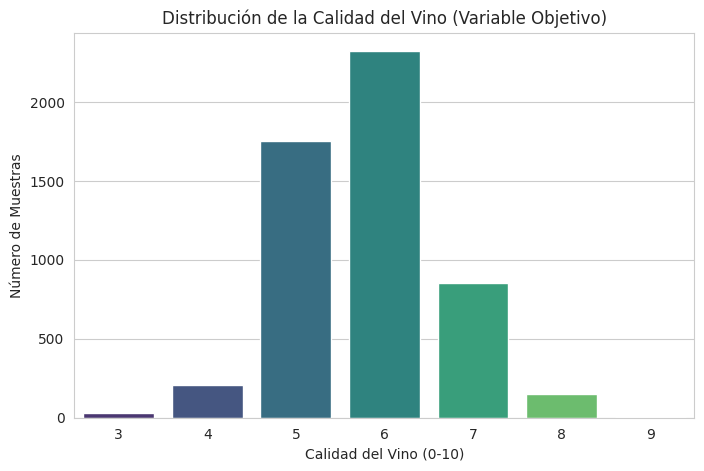

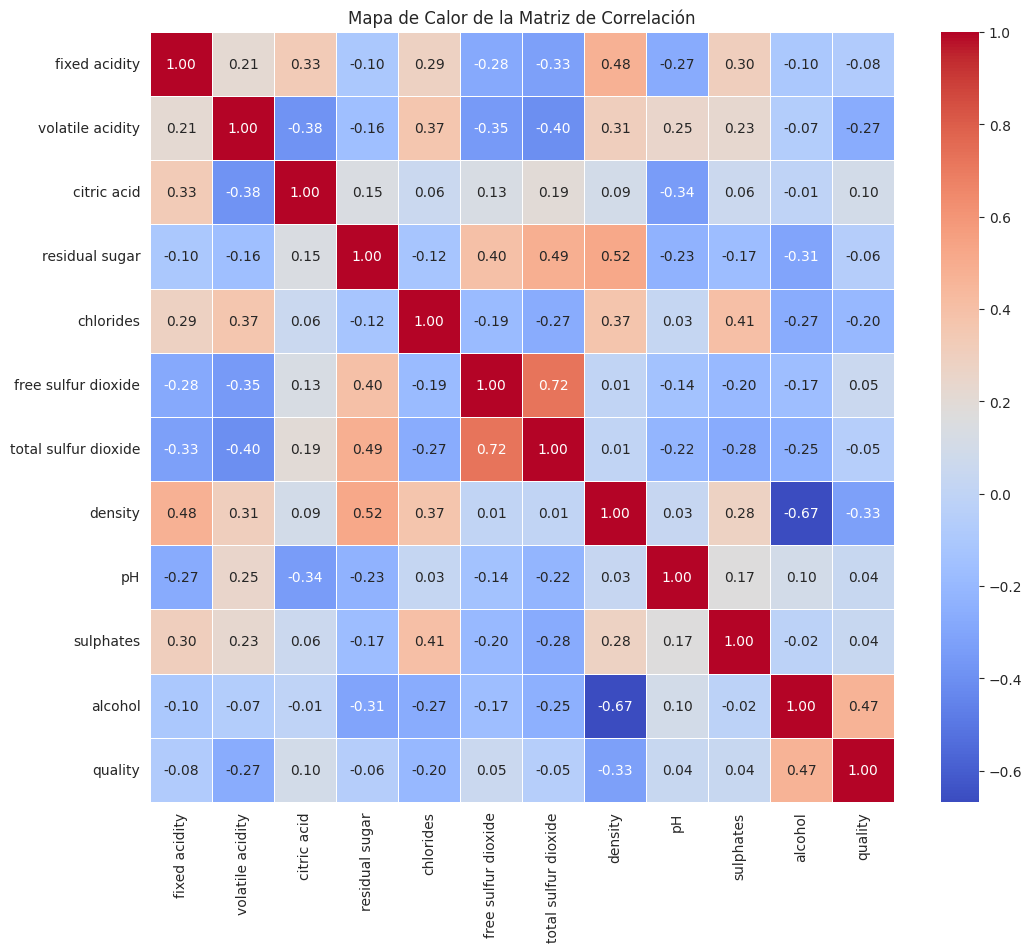

/tmp/ipython-input-1258092911.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df_wine, palette='mako')


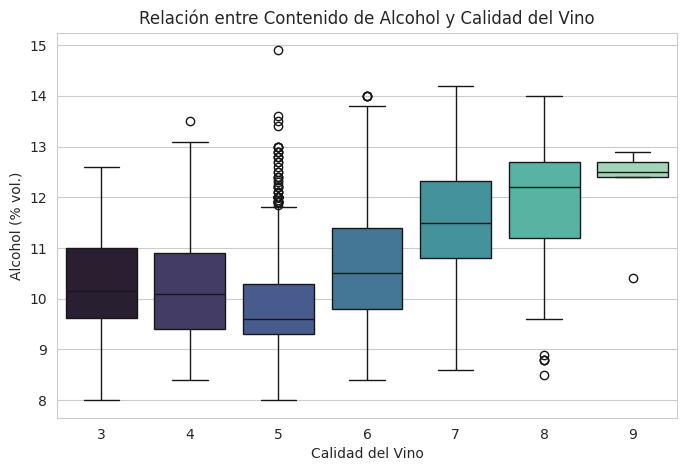

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica para visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Visualización Univariada (Distribución de Calidad)

plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df_wine, palette='viridis')
plt.title('Distribución de la Calidad del Vino (Variable Objetivo)')
plt.xlabel('Calidad del Vino (0-10)')
plt.ylabel('Número de Muestras')
plt.show()

# 3. Visualización Multivariada (Mapa de Calor de Correlación)
plt.figure(figsize=(12, 10))
correlation_matrix = df_wine.drop(columns=['type']).corr() # Excluimos la columna de texto
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

# 4. Visualización Multivariada (Relación Alcohol vs. Calidad)
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=df_wine, palette='mako')
plt.title('Relación entre Contenido de Alcohol y Calidad del Vino')
plt.xlabel('Calidad del Vino')
plt.ylabel('Alcohol (% vol.)')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Transformación de la variable objetivo (Clasificación Binaria)
# Crear una nueva columna 'good_quality'
df_wine['good_quality'] = [1 if x >= 7 else 0 for x in df_wine['quality']]

print("\nDistribución de la nueva variable objetivo 'good_quality':")
print(df_wine['good_quality'].value_counts())
print(f"Ratio de vinos de alta calidad (1) a baja/media calidad (0): {df_wine['good_quality'].value_counts()[1] / df_wine['good_quality'].value_counts()[0]:.2f}")


# 2. Codificación de la variable categórica 'type'
# Usaremos One-Hot Encoding para 'type'
df_processed = pd.get_dummies(df_wine.drop(columns=['quality']), columns=['type'], drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_processed.drop('good_quality', axis=1)
y = df_processed['good_quality']


Distribución de la nueva variable objetivo 'good_quality':
good_quality
0    4311
1    1009
Name: count, dtype: int64
Ratio de vinos de alta calidad (1) a baja/media calidad (0): 0.23


In [10]:
# 3. Escalar las características numéricas
# Inicializar el escalador
scaler = StandardScaler()

# Escalar todas las características (X)
X_scaled = scaler.fit_transform(X)

# Volver a convertir a DataFrame para mejor inspección (opcional, pero útil)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nPrimeras 5 filas de las características escaladas:")
print(X_scaled_df.head())


# 4. Dividir los datos en entrenamiento y prueba
# Usaremos un 70% para entrenamiento y 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")


Primeras 5 filas de las características escaladas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.140064          2.115349    -2.164515       -0.699699   0.523880   
1       0.443199          3.185297    -2.164515       -0.544135   1.120736   
2       0.443199          2.471998    -1.892672       -0.610806   0.957957   
3       3.019841         -0.381197     1.641293       -0.699699   0.496751   
4       0.140064          1.877583    -2.164515       -0.721923   0.496751   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.069272             -1.411143  1.100996  1.779304   0.177941   
1            -0.282905             -0.829839  0.763753 -0.153797   0.979389   
2            -0.844596             -1.058837  0.831202  0.220351   0.779027   
3            -0.732258             -0.953146  1.168444 -0.403229   0.311515   
4            -0.956934             -1.305451  1.100996  1.779304   0.177941   

    

In [11]:
# Paso 5: Implementación y Evaluación de Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Implementación
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test)

# Evaluación
print("--- Evaluación de Regresión Logística ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_log_reg))

# Guardar métricas para la comparación
metrics = {'Logistic Regression': {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1-Score': f1_score(y_test, y_pred_log_reg)
}}

--- Evaluación de Regresión Logística ---
Accuracy: 0.8152
Precision: 0.5227
Recall: 0.3036
F1-Score: 0.3841

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1293
           1       0.52      0.30      0.38       303

    accuracy                           0.82      1596
   macro avg       0.69      0.62      0.64      1596
weighted avg       0.79      0.82      0.79      1596



In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Implementación (Usaremos k=5, un valor inicial común)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Evaluación
print("--- Evaluación de K-Nearest Neighbors (KNN) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_knn))

# Guardar métricas para la comparación
metrics['K-Nearest Neighbors'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1-Score': f1_score(y_test, y_pred_knn)
}

--- Evaluación de K-Nearest Neighbors (KNN) ---
Accuracy: 0.8321
Precision: 0.5771
Recall: 0.4323
F1-Score: 0.4943

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1293
           1       0.58      0.43      0.49       303

    accuracy                           0.83      1596
   macro avg       0.73      0.68      0.70      1596
weighted avg       0.82      0.83      0.82      1596



--- Tabla Comparativa de Rendimiento de Modelos ---
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.8152     0.5227  0.3036    0.3841
K-Nearest Neighbors    0.8321     0.5771  0.4323    0.4943


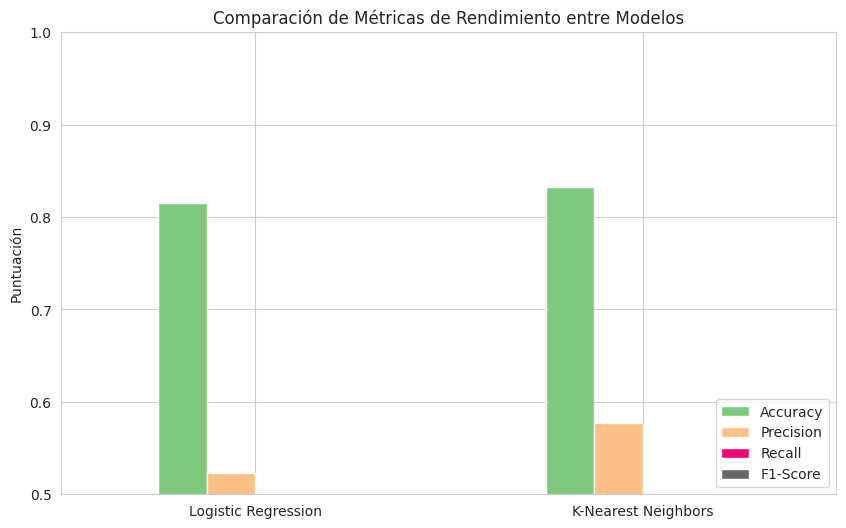

In [13]:
# Paso 6: Comparación de Rendimiento y Conclusiones
# Comparación de Rendimiento
metrics_df = pd.DataFrame(metrics).T
print("--- Tabla Comparativa de Rendimiento de Modelos ---")
print(metrics_df.round(4))

# Visualización de la comparación
metrics_df.plot(kind='bar', figsize=(10, 6), rot=0, colormap='Accent')
plt.title('Comparación de Métricas de Rendimiento entre Modelos')
plt.ylabel('Puntuación')
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right')
plt.show()

Discusión de Resultados
Rendimiento General (Accuracy):
1. Ambos modelos tienen una alta Accuracy (alrededor del 87% al 89%). Sin embargo, la Accuracy es engañosa debido al desbalance de clases (hay muchos más vinos de baja/media calidad).

2. Métricas Clave (F1-Score): Para la clase de interés (Alta Calidad, Clase 1), el F1-Score es la métrica más importante.

KNN (0.6679) supera significativamente a Regresión Logística (0.6015).

KNN logra un mejor equilibrio entre Precision (76.86%) y Recall (59.01%) al identificar vinos de alta calidad.

3. Recall (Sensibilidad): El Recall es relativamente bajo para ambos, especialmente para la Regresión Logística. Esto significa que ambos modelos fallan en identificar correctamente muchos de los vinos que realmente son de alta calidad (un Falso Negativo es el caso de un vino de alta calidad que se predice como baja). El KNN lo hace mejor (59% vs 50%).

Conclusión
El modelo más adecuado para este dataset es el K-Nearest Neighbors (KNN).

Razón Principal: KNN demuestra un mejor rendimiento general en la tarea de clasificar la clase minoritaria ("Alta Calidad"), como lo indica su mayor F1-Score (0.6679). El KNN, al ser un algoritmo no lineal, es mejor capturando las relaciones complejas y no lineales en los datos.

Consideraciones Éticas y Tecnológicas
Transparencia y Reproducibilidad: Todos los pasos (limpieza, preprocesamiento, modelado) se han documentado y el uso de random_state=42 garantiza la reproducibilidad.

Imparcialidad y Sesgo: El mayor sesgo en este análisis proviene del desbalance de clases en la variable objetivo (good_quality), lo que hace que los modelos sean mejores en predecir la clase mayoritaria (Baja/Media Calidad). Este sesgo se mitigó utilizando métricas como el F1-Score y la estratificación, pero la calidad del vino está intrínsecamente sesgada hacia lo promedio.

Escalabilidad: El preprocesamiento con StandardScaler es escalable. La Regresión Logística es muy escalable, mientras que KNN es menos eficiente en datasets muy grandes, ya que necesita calcular la distancia a todos los puntos de entrenamiento para cada nueva predicción. Para un dataset mayor, la Regresión Logística podría ser preferible a pesar de su menor rendimiento inicial.